# check feature importance using XGBoost

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv 

from numpy import loadtxt 
from xgboost import XGBClassifier, XGBRegressor 
from xgboost import plot_importance 
from matplotlib import pyplot 
from sklearn.metrics import accuracy_score 


In [6]:
train_file = 'train_sample.csv' 
testA_file = 'testA_sample.csv'  
testB_file = 'testB_sample.csv'


### Select feature columns fro train & read data 

In [7]:
from numpy import loadtxt 
from xgboost import XGBClassifier, XGBRegressor 
from xgboost import plot_importance 
from matplotlib import pyplot 
from sklearn.metrics import accuracy_score 

total_Cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
use_feature_Cols = [0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
label_Cols = [20] 

dataset_train = loadtxt(train_file, delimiter=',',skiprows=1, usecols=use_feature_Cols) 
X_train_original = dataset_train[:,0:] 
dataset_label = loadtxt(train_file, delimiter=',', skiprows=1, usecols=label_Cols) 
y_train_original = dataset_label[:] 

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

mm = MinMaxScaler() 
ss = StandardScaler() 
rs = RobustScaler(quantile_range=(25.0,75.0)) 

# scaler = mm 
scaler = ss 
# scaler = rs 
X_train_original_scaled = scaler.fit_transform(X_train_original) 

print(X_train_original_scaled.shape) 
print(y_train_original.shape) 

(10, 18)
(10,)


In [9]:
#model_1 = XGBClassifier() 
model_1 = XGBRegressor(verbosity=0) 
model_1.fit(X_train_original_scaled, y_train_original) 


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [10]:
# make predictions for test data 
y_pred_1 = model_1.predict(X_train_original_scaled) 
# evaluate predictions 
accuracy_1 = accuracy_score(y_train_original, predictions) 
print("accuracy_1:", %.2f%% % (accuracy_1 * 100.0)) 



SyntaxError: invalid syntax (<ipython-input-10-276f81524a3c>, line 5)

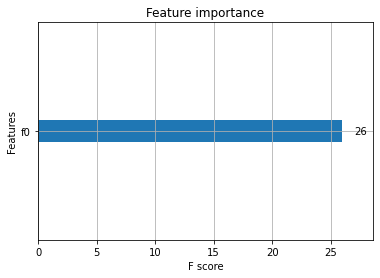

In [12]:
plot_importance(model_1) 
pyplot.rcParams['figure.figsize'] = [12, 8] 
pyplot.rcParams['figure.dpi'] = 100 # 200 
pyplot.show() 

In [13]:
dataset_testA = loadtxt(testA_file, delimiter=',', skiprows=1, usecols=use_feature_Cols) 
dataset_testB = loadtxt(testB_file, delimiter=',', skiprows=1, usecols=use_feature_Cols) 

X_testA_original = dataset_testA[:,0:] 
X_testB_original = dataset_testB[:,0:] 

### Use only Last Data of Each Serial Number 

In [16]:
def lastDataOnly2(dataset, X_original, y_original, X, y): 
    for i in range(len(dataset)): 
        if i == len(dataset) - 1: 
            X.append(X_original[i - 1]) 
            y.append(y_original[i - 1]) 
        else: 
            if not dataset[i][0] == dataset[i+1][0]: 
                X.append(X_original[i]) 
                y.append(y_original[i]) 

def lastDataOnly(dataset, X_original, X): 
    for i in range(len(dataset)): 
        if i == len(dataset) - 1: 
            X.append(X_original[i - 1]) 
        else: 
            if not dataset[i][0] == dataset[i+1][0]: 
                X.append(X_original[i]) 

X = [] 
y = [] 
lastDataOnly2(dataset_train, X_train_original, y_train_original, X, y) 
X = np.array(X) 
y = np.array(y) 

X_testA = [] 
lastDataOnly(dataset_testA, X_testA_original, X_testA) 
X_testA = np.array(X_testA) 

X_testB = [] 
lastDataOnly(dataset_testB, X_testB_original, X_testB) 
X_testB = np.array(X_testB) 

X = [] 
y = [] 
for i in range(len(dataset_train)): 
    if i == len(dataset_train) - 1: 
        X.append(X_train_original[i - 1]) 
        y.append(y_train_original[i - 1]) 
    else: 
        if not dataset_train[i][0] == dataset_train[i+1][0]: 
            X.append(X_train_original[i]) 
            y.append(y_train_original[i]) 

X = np.array(X) 
y = np.array(y) 


### Normalize for training set - max 

In [18]:
from sklearn.preprocessing import normalize 

# X = normalize(X, norm=’l1’) 
# X = normalize(X, norm=’l2’) 
X = normalize(X, norm='max') 

### Normalize for test set – max 

In [19]:
from sklearn.preprocessing import normalize 

# X_testA = normalize(X_testA, norm=’l1’) 
# X_testA = normalize(X_testA, norm=’l2’) 
X_testA = normalize(X_testA, norm='max') 

# X_testB = normalize(X_testB, norm=’l1’) 
# X_testB = normalize(X_testB, norm=’l2’) 
X_testB = normalize(X_testB, norm='max') 

### 1 model_1 – default XGBClassifier() 

In [20]:
model_1 = XGBClassifier() 

model_1.fit(X,y)  


c:\users\acemo\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 2 model –  

In [22]:
model_2 = XGBClassifier(silent=None, objective='binary:hinge', eval_metric='error', verbosity=3, learning_rate=0.001, num_rounds=1000, num_boost_round=1000, n_estimators=1000) 
 
model_2.fit(X,y) 


[15:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_boost_round", "num_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:00] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2

[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned

[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_boost_round=1000, num_parallel_tree=1, num_rounds=1000,
              objective='binary:hinge', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=None, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

### 3 model_3 –   

In [23]:
model_3 = XGBClassifier(silent=None, objective='binary:hinge', eval_metric='error', verbosity=3, learning_rate=0.001, num_rounds=1000, num_boost_round=1000, n_estimators=2000) 

model_3.fit(X,y) 


[15:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_boost_round", "num_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:03] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:155: Using tree method: 2
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2

[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned

[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned

[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned

[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:22:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 0 extra nodes, 0 pruned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=12,
              num_boost_round=1000, num_parallel_tree=1, num_rounds=1000,
              objective='binary:hinge', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=None, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

### Predict by training set 

In [25]:
y_pred_1 = model_1.predict(X) 
predictions = [round(value) for value in y_pred_1] 
accuracy_1 = accuracy_score(y, predictions) 

y_pred_2 = model_2.predict(X) 
predictions = [round(value) for value in y_pred_2] 
accuracy_2 = accuracy_score(y, predictions) 

y_pred_3 = model_3.predict(X) 
predictions = [round(value) for value in y_pred_3] 
accuracy_3 = accuracy_score(y, predictions) 

print("accuracy_1: %.2f%%" % (accuracy_1 * 100.0))
print("accuracy_2: %.2f%%" % (accuracy_2 * 100.0)) 
print("accuracy_3: %.2f%%" % (accuracy_3 * 100.0)) 

accuracy_1: 50.00%
accuracy_2: 50.00%
accuracy_3: 100.00%


### Predict by testA set 

In [26]:
y_pred_A_1 = model_1.predict(X_testA) 
y_pred_A_2 = model_2.predict(X_testA) 
y_pred_A_3 = model_3.predict(X_testA) 

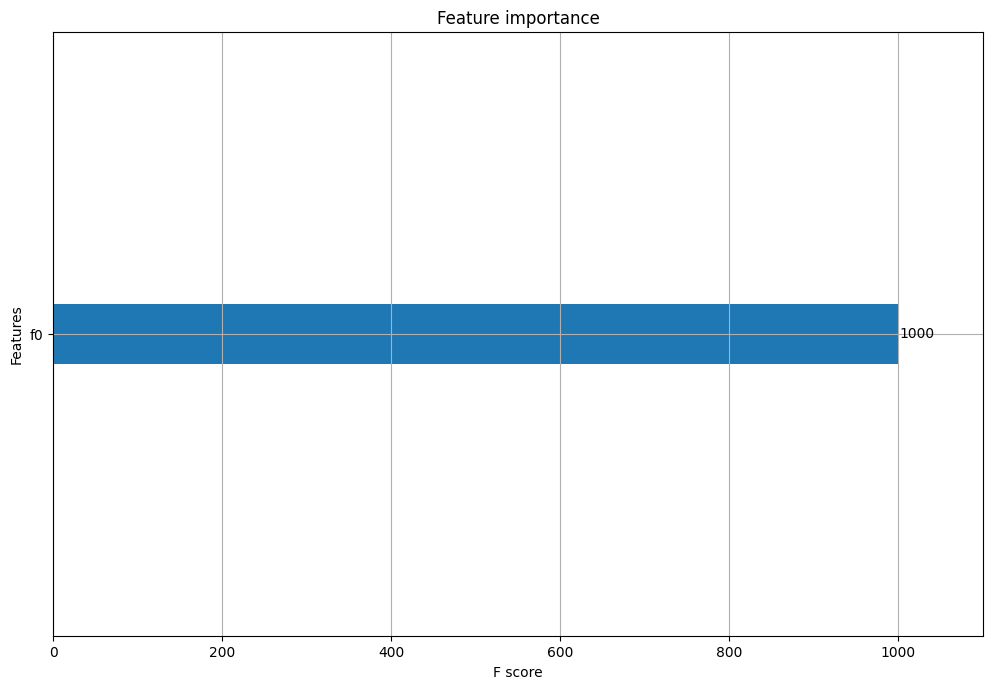

In [29]:
plot_importance(model_2) 
pyplot.rcParams['figure.figsize'] = [12, 8] 
pyplot.rcParams['figure.dpi'] = 100 # 200 
pyplot.show() 